In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sys
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from collections import Counter
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

## Data

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe (1/0) a term deposit (variable y).

This dataset provides the customer information. It includes 41188 records and 21 fields.

In [2]:
data = pd.read_csv(r'D:\Excess\skillovilla\Project\ML Project\bank.csv')
data.shape

(4119, 21)

In [3]:
### Q. Read the bank dataset 

In [4]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [5]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


#### Input variables

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

16 - emp.var.rate: employment variation rate - (numeric)

17 - cons.price.idx: consumer price index - (numeric)

18 - cons.conf.idx: consumer confidence index - (numeric) 

19 - euribor3m: euribor 3 month rate - (numeric)

20 - nr.employed: number of employees - (numeric)

#### Predict variable (desired target):

y - has the client subscribed a term deposit? (binary: '1','0')

The education column of the dataset has many categories and we need to reduce the categories for a better modelling. The education column has the following categories:

In [6]:
### Data transformation
data['education'].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [7]:
### Data transformation
data['education'].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

Let us group "basic.4y", "basic.9y" and "basic.6y" together and call them "basic".

In [8]:
data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])

In [9]:
data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])

After grouping, this is the columns

In [10]:
data['education'].unique()

array(['Basic', 'high.school', 'university.degree', 'professional.course',
       'unknown', 'illiterate'], dtype=object)

In [11]:
data['education'].unique()

array(['Basic', 'high.school', 'university.degree', 'professional.course',
       'unknown', 'illiterate'], dtype=object)

### Data preparation

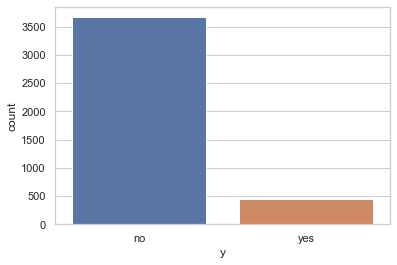

In [12]:
# count plot on single categorical variable
sns.countplot(x ='y', data = data)
 
# Show the plot
plt.show()

In [13]:
data=data.replace(to_replace="no",value="0")
data=data.replace(to_replace="yes",value="1")
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,Basic,0,1,0,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,0,0,0,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,0,1,0,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,Basic,0,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,0,1,0,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,Basic,0,1,1,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,0
4115,39,admin.,married,high.school,0,1,0,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,0
4116,27,student,single,high.school,0,0,0,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,0
4117,58,admin.,married,high.school,0,0,0,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0


In [14]:
### Q. Find out in the target column what is the respective count of values
### Q. Also plot the values of y in form of a bar graph

There are 36548 no's and 4640 yes's in the outcome variables.

Let's get a sense of the numbers across the two classes

Text(0, 0.5, 'Frequency of Purchase')

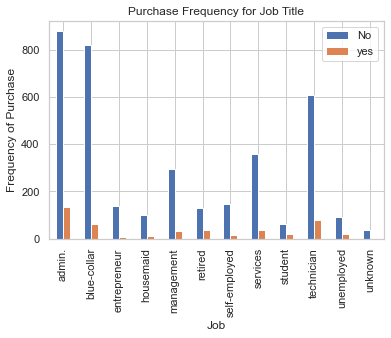

In [15]:
table = pd.crosstab(data.job, data.y)
table.columns = ['No', 'yes']
table.plot(kind='bar')

plt.grid(True)

plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')

In [16]:
## Create a visualization as shown below for variable 'job' and frequency of purchase

The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

Text(0, 0.5, 'Proportion of Customers')

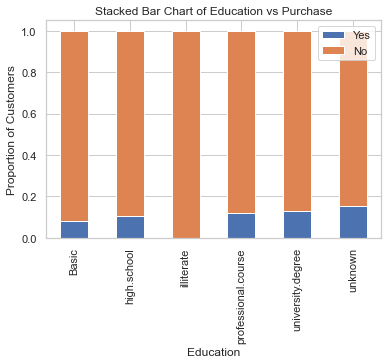

In [17]:
table = pd.crosstab(data.education,data.y)
table = table.div(table.sum(1).astype(float), axis=0)
table.columns = ['No', 'Yes']
# Ordering stacked bars and plot the chart
table[['Yes', 'No']].plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')

In [18]:
### Create a stacked bar chart between variables 'Education','Purchase' and Proportion of Customers



Education seems a good predictor of the outcome variable.

Text(0, 0.5, 'Frequency of Purchase')

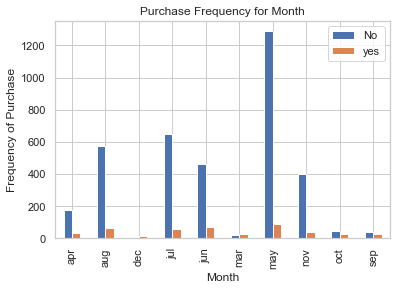

In [19]:
table = pd.crosstab(data.month, data.y)
table.columns = ['No', 'yes']
table.plot(kind='bar')

plt.grid(True)

plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')

In [20]:
## Q. Write code for the visualization as shown below

Month might be a good predictor of the outcome variable

In [21]:
## Q. Write code for the visualization as shown below

The most of the customers of the bank in this dataset are in the age range of 30-40.

In [22]:
## Write code to convert following columns to equivalent dummy variables

cat_vars=data[['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']]
cat_vars.head(5)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,blue-collar,married,Basic,0,1,0,cellular,may,fri,nonexistent
1,services,single,high.school,0,0,0,telephone,may,fri,nonexistent
2,services,married,high.school,0,1,0,telephone,jun,wed,nonexistent
3,services,married,Basic,0,unknown,unknown,telephone,jun,fri,nonexistent
4,admin.,married,university.degree,0,1,0,cellular,nov,mon,nonexistent


In [23]:
cat_vars.shape

(4119, 10)

lst = [cat_vars]
for column in lst:
    column.loc[column["month"] == "jan", "month_int"] = 1
    column.loc[column["month"] == "feb", "month_int"] = 2
    column.loc[column["month"] == "mar", "month_int"] = 3
    column.loc[column["month"] == "apr", "month_int"] = 4
    column.loc[column["month"] == "may", "month_int"] = 5
    column.loc[column["month"] == "jun", "month_int"] = 6
    column.loc[column["month"] == "jul", "month_int"] = 7
    column.loc[column["month"] == "aug", "month_int"] = 8
    column.loc[column["month"] == "sep", "month_int"] = 9
    column.loc[column["month"] == "oct", "month_int"] = 10
    column.loc[column["month"] == "nov", "month_int"] = 11
    column.loc[column["month"] == "dec", "month_int"] = 12
    
#for column in lst:
    column.loc[column["day_of_week"] == "mon", "month_int"] = 1
    column.loc[column["day_of_week"] == "tue", "month_int"] = 2
    column.loc[column["day_of_week"] == "wed", "month_int"] = 3
    column.loc[column["day_of_week"] == "thu", "month_int"] = 4
    column.loc[column["day_of_week"] == "fri", "month_int"] = 5
    column.loc[column["day_of_week"] == "sat", "month_int"] = 6
    column.loc[column["day_of_week"] == "sun", "month_int"] = 7

In [24]:
#cat_vars['poutcome'] = cat_vars['poutcome'].map({'nonexistent': 0, 'failure': 1, 'success': 2})
#cat_vars['education'] = cat_vars['education'].map({'Basic': 0, 'high.school': 1, 'university.degree': 2, 'professional.course': 3})
#cat_vars['martial'] = cat_vars['martial'].map({'single': 1, 'married': 2, 'divorced': 3})
#cat_vars['contact'] = cat_vars['loan'].map({'cellular': 1, 'telephone': 0})

In [25]:
# load X and y
X = data.drop(columns=['y'])
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (3295, 20)
Number transactions y_train dataset:  (3295,)
Number transactions X_test dataset:  (824, 20)
Number transactions y_test dataset:  (824,)


In [26]:
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns.values
numeric_features = numeric_features[numeric_features != 'y']

category_features = X_train.select_dtypes(include=['object', 'bool']).columns.values

print(numeric_features)
print(category_features)

['age' 'duration' 'campaign' 'pdays' 'previous' 'emp.var.rate'
 'cons.price.idx' 'cons.conf.idx' 'euribor3m' 'nr.employed']
['job' 'marital' 'education' 'default' 'housing' 'loan' 'contact' 'month'
 'day_of_week' 'poutcome']


In [27]:
def dummify(ohe, x, columns):
    transformed_array = ohe.transform(x)

    # list of category columns
    enc = ohe.named_transformers_['cat'].named_steps['onehot']
    feature_lst = enc.get_feature_names(category_features.tolist())   
    
    cat_colnames = np.concatenate([feature_lst]).tolist()
    all_colnames = numeric_features.tolist() + cat_colnames 
    
    # convert numpy array to dataframe
    data = pd.DataFrame(transformed_array, index = x.index, columns = all_colnames)
    
    return transformed_array, data

In [28]:
from sklearn.pipeline import Pipeline, FeatureUnion

# impute missing numerical values with a median value, then scale the values
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# impute missing categorical values using the 'missing' and one hot encode the categories
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Each transformer is a three-element tuple that defines 
#                                 the name of the transformer, 
#                                 the transform to apply, 
#                                 and the column features to apply it to
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, category_features)])

ohe = preprocessor.fit(X_train)

X_train_t = ohe.transform(X_train)
X_test_t = ohe.transform(X_test)

In [29]:
# transform training and test set and then convert it to dataframe
X_train_t_array, X_train_t = dummify(ohe, X_train, category_features)
X_test_t_array, X_test_t = dummify(ohe, X_test, category_features)

X_train_t.head()

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
3199,-0.977249,1.653155,-0.195607,0.204284,-0.356918,0.656694,0.724940,0.893779,0.718152,0.337601,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3258,0.179962,4.089944,-0.195607,0.204284,-0.356918,0.848657,-0.225414,0.959086,0.782660,0.840066,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3153,0.758567,-0.678869,-0.587892,0.204284,-0.356918,-0.111158,-0.647026,-0.325278,0.335138,0.402610,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
399,-0.977249,0.004053,-0.195607,0.204284,1.495123,-0.111158,-0.647026,-0.325278,0.237225,0.402610,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1410,-1.170117,-0.131755,-0.587892,0.204284,-0.356918,-1.198948,-1.177496,-1.239570,-1.335146,-0.907050,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [30]:
X_train_columns = X_train_t.columns
print(X_train_columns)

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_0',
       'default_1', 'default_unknown', 'housing_0', 'housing_1',
       'housing_unknown', 'loan_0', 'loan_1', 'loan_unknown',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_of_week_

In [31]:
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer

# summarize class distribution
counter = Counter(y_train)
print(counter)

# transform the dataset
oversample = SMOTE()
X_train_smote, y_train = oversample.fit_resample(X_train_t, y_train)

# summarize the new class distribution
counter = Counter(y_train)
print(counter)

Counter({'0': 2920, '1': 375})
Counter({'1': 2920, '0': 2920})


In [32]:
from sklearn.svm import SVC

final_X_train = pd.DataFrame(data=X_train_smote,columns=X_train_columns )
final_y_train = pd.DataFrame(data=y_train,columns=['y'])

rfe_model = RFE(LogisticRegression(solver='lbfgs', max_iter=1000))
rfe_model = rfe_model.fit(final_X_train, final_y_train)

# feature selection
print(rfe_model.support_)
print(rfe_model.ranking_)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[False  True  True False False  True  True  True False False False  True
  True False  True  True  True  True  True  True  True False  True False
 False False False False False  True  True False  True False False False
 False False  True False  True  True  True  True False  True False False
  True  True  True  True False False False False False False  True False
  True]
[ 3  1  1 29 22  1  1  1  7 28  2  1  1 14  1  1  1  1  1  1  1 11  1 16
 17 10 25 24 21  1  1 20  1 32 15 30  8 19  1 23  1  1  1  1  6  1 18 13
  1  1  1  1 12  4 31 26  5  9  1 27  1]


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
selected_columns = X_train_columns[rfe_model.support_]
print(selected_columns.tolist())

['duration', 'campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'job_blue-collar', 'job_entrepreneur', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'marital_divorced', 'education_professional.course', 'education_university.degree', 'default_0', 'loan_0', 'loan_unknown', 'contact_cellular', 'contact_telephone', 'month_apr', 'month_dec', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'poutcome_failure', 'poutcome_success']


In [34]:
X_train_final = final_X_train[selected_columns.tolist()]
y_train_final = final_y_train['y']
X_test_final = X_test_t[selected_columns.tolist()]
y_test_final = y_test

X_test_final.head()

,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,job_blue-collar,job_entrepreneur,job_management,job_retired,job_self-employed,...,contact_cellular,contact_telephone,month_apr,month_dec,month_mar,month_may,month_nov,month_oct,poutcome_failure,poutcome_success
3754,-0.651707,-0.587892,0.848657,1.538789,-0.281740,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45,0.601610,-0.195607,-1.198948,-1.177496,-1.239570,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2774,0.589969,0.588963,0.848657,1.538789,-0.281740,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1170,0.826664,-0.587892,0.848657,0.593618,-0.477660,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4042,-0.046390,0.588963,-0.111158,-0.647026,-0.325278,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train_final, y_train_final)

LogisticRegression()

In [36]:
y_pred = logreg.predict(X_test_final)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_final, y_test_final)))

Accuracy of logistic regression classifier on test set: 0.85


In [37]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test_final, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91       748
           1       0.36      0.80      0.50        76

    accuracy                           0.85       824
   macro avg       0.67      0.83      0.70       824
weighted avg       0.92      0.85      0.87       824



[[639 109]
 [ 15  61]]


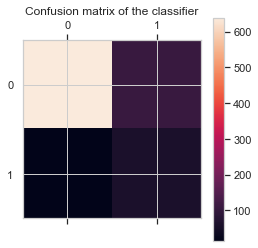

In [38]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix
import pylab as pl

print(confusion_matrix(y_test_final, y_pred))

cm = confusion_matrix(y_test_final, y_pred)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

In [54]:
pip install scikit-plot

0.8284548269068392
<function roc_auc_score at 0x0000011AA8D71160>


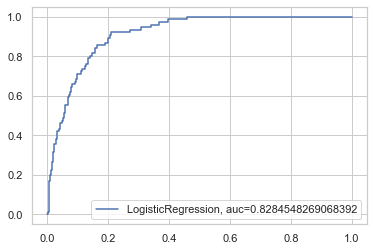

In [72]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

lr_over = LogisticRegression()
lr_over.fit(X_train_final, y_train_final.ravel())
predictions_over = lr_over.predict(X_test_final)

def plotRocAuc(model, X, y):

    probabilities = model.predict_proba(X)
    probabilities = probabilities[:, 1]
    fpr, tpr, thresholds = roc_curve(y, probabilities)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr, tpr, marker='.')
    plt.text(0.75, 0.25, "AUC: " + str(round(roc_auc_score(y, probabilities),2)))
plt.show()

# Predicting the Test set results
y_pred = (y_pred > 0.5)
matrix = metrics.confusion_matrix(y_test.astype(int).tolist(), y_pred.astype(int).tolist())

y_pred = lr_over.predict_proba(X_test_final)[::,1]
fpr, tpr, _ = roc_curve(y_test_final, y_pred, pos_label=1)
auc = roc_auc_score(y_test, predictions_over)
print(auc)
print(roc_auc_score)
plt.plot(fpr,tpr,label="LogisticRegression, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [44]:
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

#
# Create an instance of Pipeline
#
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100, max_depth=4))
#
# Create an instance of StratifiedKFold which can be used to get indices of different training and test folds
#
strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(X_train_final, y_train_final)
scores = []
#
#
#
for k, (train, test) in enumerate(kfold):
    pipeline.fit(X_train_final.iloc[train, :], y_train_final.iloc[train])
    score = pipeline.score(X_train_final.iloc[test, :], y_train_final.iloc[test])
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train_final.iloc[train]), score))
    print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

Fold:  1, Training/Test Split Distribution: [2628 2628], Accuracy: 0.827


Cross-Validation accuracy: 0.827 +/- 0.000
Fold:  2, Training/Test Split Distribution: [2628 2628], Accuracy: 0.889


Cross-Validation accuracy: 0.858 +/- 0.031
Fold:  3, Training/Test Split Distribution: [2628 2628], Accuracy: 0.913


Cross-Validation accuracy: 0.876 +/- 0.036
Fold:  4, Training/Test Split Distribution: [2628 2628], Accuracy: 0.890


Cross-Validation accuracy: 0.880 +/- 0.032
Fold:  5, Training/Test Split Distribution: [2628 2628], Accuracy: 0.901


Cross-Validation accuracy: 0.884 +/- 0.030
Fold:  6, Training/Test Split Distribution: [2628 2628], Accuracy: 0.904


Cross-Validation accuracy: 0.887 +/- 0.028
Fold:  7, Training/Test Split Distribution: [2628 2628], Accuracy: 0.890


Cross-Validation accuracy: 0.888 +/- 0.026
Fold:  8, Training/Test Split Distribution: [2628 2628], Accuracy: 0.916


Cross-Validation accuracy: 0.891 +/- 0.026
Fold:  9, Training/Test Split Distribution: [2628 2628],

In [81]:
from hyperopt import tpe, hp, fmin, STATUS_OK,Trials
from hyperopt.pyll.base import scope
from sklearn.model_selection import cross_val_score

# standardize the feature variables 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_test_final)


space = {
    "n_estimators": hp.choice("n_estimators", [100, 200, 300, 400,500,600]),
    "max_depth": hp.quniform("max_depth", 1, 15,1),
    "criterion": hp.choice("criterion", ["gini", "entropy"]),
}
                                
# define objective function

def hyperparameter_tuning(params):                      
    clf = RandomForestClassifier(**params,n_jobs=-1)
    acc = cross_val_score(clf, X_scaled, y_test_final,scoring="accuracy").mean()
    return {"loss": -acc, "status": STATUS_OK}

# Initialize trials object
trials = Trials()

best = fmin(
    fn=hyperparameter_tuning,
    space = space, 
    algo=tpe.suggest, 
    max_evals=100, 
    trials=trials
)

print("Best: {}".format(best))

100%|█████████████████████████████████████████████| 100/100 [05:23<00:00,  3.24s/trial, best loss: -0.9138359201773836]
Best: {'criterion': 1, 'max_depth': 12.0, 'n_estimators': 0}


In [82]:
trials.results

[{'loss': -0.908980044345898, 'status': 'ok'},
 {'loss': -0.9065484109386549, 'status': 'ok'},
 {'loss': -0.9053436807095343, 'status': 'ok'},
 {'loss': -0.9065558019216556, 'status': 'ok'},
 {'loss': -0.9077679231337769, 'status': 'ok'},
 {'loss': -0.9053362897265338, 'status': 'ok'},
 {'loss': -0.908980044345898, 'status': 'ok'},
 {'loss': -0.9065558019216555, 'status': 'ok'},
 {'loss': -0.9041315594974131, 'status': 'ok'},
 {'loss': -0.9101921655580192, 'status': 'ok'},
 {'loss': -0.9089874353288987, 'status': 'ok'},
 {'loss': -0.9065484109386549, 'status': 'ok'},
 {'loss': -0.9065484109386549, 'status': 'ok'},
 {'loss': -0.908980044345898, 'status': 'ok'},
 {'loss': -0.9077679231337766, 'status': 'ok'},
 {'loss': -0.9101921655580192, 'status': 'ok'},
 {'loss': -0.9077679231337766, 'status': 'ok'},
 {'loss': -0.908980044345898, 'status': 'ok'},
 {'loss': -0.908980044345898, 'status': 'ok'},
 {'loss': -0.9077679231337766, 'status': 'ok'},
 {'loss': -0.9077679231337766, 'status': 'ok'

In [83]:
trials.losses()

[-0.908980044345898,
 -0.9065484109386549,
 -0.9053436807095343,
 -0.9065558019216556,
 -0.9077679231337769,
 -0.9053362897265338,
 -0.908980044345898,
 -0.9065558019216555,
 -0.9041315594974131,
 -0.9101921655580192,
 -0.9089874353288987,
 -0.9065484109386549,
 -0.9065484109386549,
 -0.908980044345898,
 -0.9077679231337766,
 -0.9101921655580192,
 -0.9077679231337766,
 -0.908980044345898,
 -0.908980044345898,
 -0.9077679231337766,
 -0.9077679231337766,
 -0.9101995565410199,
 -0.908980044345898,
 -0.9101995565410199,
 -0.9089874353288987,
 -0.9077679231337769,
 -0.9077753141167776,
 -0.908980044345898,
 -0.9077679231337769,
 -0.9077753141167776,
 -0.9065558019216555,
 -0.9101921655580192,
 -0.9065558019216556,
 -0.9077679231337766,
 -0.908980044345898,
 -0.908980044345898,
 -0.9077679231337769,
 -0.9077679231337769,
 -0.9077605321507761,
 -0.9077753141167776,
 -0.9029120473022912,
 -0.908980044345898,
 -0.9065484109386548,
 -0.908980044345898,
 -0.9065631929046564,
 -0.9077679231337769,

In [84]:
trials.statuses()

['ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok']

In [86]:
pip install git+https://github.com/hyperopt/hyperopt-sklearn

  Cloning https://github.com/hyperopt/hyperopt-sklearn to c:\users\dell\appdata\local\temp\pip-req-build-g_jdi5rt
Note: you may need to restart the kernel to use updated packages.


  ERROR: Error [WinError 2] The system cannot find the file specified while executing command git version
ERROR: Cannot find command 'git' - do you have 'git' installed and in your PATH?


In [85]:
from hpsklearn import HyperoptEstimator, random_forest_classifier

classifier = HyperoptEstimator(classifier=random_forest_classifier("rf_classifier"))
classifier.fit(X_scaled, y_test_final)

print(classifier.best_model())
print(classifier.score(X_scaled, y_test_final))

ModuleNotFoundError: No module named 'hpsklearn'

### Feature Selection

In [ ]:
## Find the best posible features using feature engineering techniques. 

For example --

The Recursive Feature Elimination (RFE) has helped us select the following features: "previous", "euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no", "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", "day_of_week_fri", "day_of_week_wed", "poutcome_failure", "poutcome_nonexistent", "poutcome_success".

In [ ]:
cols=["previous", "euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no", 
      "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", "day_of_week_fri", "day_of_week_wed", 
      "poutcome_failure", "poutcome_nonexistent", "poutcome_success"] 
X=data_final[cols]
y=data_final['y']

### Implementing the model

### Logistic Regression Model Fitting

In [ ]:
## Write code to implement Logistic Regression module by training the X,Y variables and perform prediction on the Test dataset.

### Confusion Matrix

In [ ]:
## Create and Analyze the confusion matrix

### ROC/AUC

In [ ]:
## Check for ROC and Area under the curve.

In [ ]:
## Calculate and analyze the Recall and precision

### Accuracy

In [ ]:
## Find the accuracy of your model

### Cross-validation

In [ ]:
## Allow 10-fold cross validation to run on all cores.

### Model Tuning

In [ ]:
## Tune in different attributes of the model and get better accuracy